In [22]:
import json
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [23]:
bn = gum.BayesNet("Credit Approval")
print(bn)

BN{nodes: 0, arcs: 0, domainSize: 1, dim: 0, mem: 0o}


In [24]:
attribute_map = {
    "1": {
        "name": "Status of existing checking account",
        "type": "categorical",
        "categories": [
            "negative_balance",
            "small_balance",
            "large_balance",
            "no_account"
        ],
        "mapping": {
            "A11": "negative_balance",
            "A12": "small_balance",
            "A13": "large_balance",
            "A14": "no_account"
        },
        "identifier": "status_checking_account"
    },
    "2": {
        "name": "Duration",
        "type": "categorical",
        "categories": [
            "short_term",
            "medium_term",
            "long_term"
        ],
        "mapping": {
            "A21": "short_term",
            "A22": "medium_term",
            "A23": "long_term"
        },
        "identifier": "loan_duration"
    },
    "3": {
        "name": "Credit history",
        "type": "categorical",
        "categories": [
            "no_credits",
            "all_credits_paid",
            "existing_credits_paid",
            "delayed_payment",
            "critical_account"
        ],
        "mapping": {
            "A30": "no_credits",
            "A31": "all_credits_paid",
            "A32": "existing_credits_paid",
            "A33": "delayed_payment",
            "A34": "critical_account"
        },
        "identifier": "credit_history"
    },
    "4": {
        "name": "Purpose",
        "type": "categorical",
        "categories": [
            "new_car",
            "used_car",
            "furniture",
            "electronics",
            "appliances",
            "repairs",
            "education",
            "vacation",
            "retraining",
            "business",
            "others"
        ],
        "mapping": {
            "A40": "new_car",
            "A41": "used_car",
            "A42": "furniture",
            "A43": "electronics",
            "A44": "appliances",
            "A45": "repairs",
            "A46": "education",
            "A47": "vacation",
            "A48": "retraining",
            "A49": "business",
            "A410": "others"
        },
        "identifier": "purpose"
    },
    "5": {
        "name": "Credit amount",
        "type": "categorical",
        "categories": [
            "low_credit",
            "medium_credit",
            "high_credit",
            "very_high_credit"
        ],
        "mapping": {
            "A51": "low_credit",
            "A52": "medium_credit",
            "A53": "high_credit",
            "A54": "very_high_credit"
        },
        "identifier": "loan_amount"
    },
    "6": {
        "name": "Savings account/bonds",
        "type": "categorical",
        "categories": [
            "low_savings",
            "medium_savings",
            "high_savings",
            "very_high_savings",
            "no_savings"
        ],
        "mapping": {
            "A61": "low_savings",
            "A62": "medium_savings",
            "A63": "high_savings",
            "A64": "very_high_savings",
            "A65": "no_savings"
        },
        "identifier": "savings_account_bonds"
    },
    "7": {
        "name": "Present employment since",
        "type": "categorical",
        "categories": [
            "unemployed",
            "less_than_1_year",
            "1_to_4_years",
            "4_to_7_years",
            "more_than_7_years"
        ],
        "mapping": {
            "A71": "unemployed",
            "A72": "less_than_1_year",
            "A73": "1_to_4_years",
            "A74": "4_to_7_years",
            "A75": "more_than_7_years"
        },
        "identifier": "employment_duration"
    },
    "8": {
        "name": "Installment rate in percentage of disposable income",
        "type": "numerical",
        "identifier": "installment_rate"
    },
    "9": {
        "name": "Personal status and sex",
        "type": "categorical",
        "categories": [
            "male_divorced",
            "female_divorced",
            "male_single",
            "male_married",
            "female_single"
        ],
        "mapping": {
            "A91": "male_divorced",
            "A92": "female_divorced",
            "A93": "male_single",
            "A94": "male_married",
            "A95": "female_single"
        },
        "identifier": "personal_status_sex"
    },
    "10": {
        "name": "Other debtors / guarantors",
        "type": "categorical",
        "categories": [
            "none",
            "co_applicant",
            "guarantor"
        ],
        "mapping": {
            "A101": "none",
            "A102": "co_applicant",
            "A103": "guarantor"
        },
        "identifier": "other_debtors_guarantors"
    },
    "11": {
        "name": "Present residence since",
        "type": "categorical",
        "categories": [
            "short",
            "medium",
            "long"
        ],
        "mapping": {
            "A111": "short",
            "A112": "medium",
            "A113": "long"
        },
        "identifier": "residence_duration"
    },
    "12": {
        "name": "Property",
        "type": "categorical",
        "categories": [
            "real_estate",
            "savings_agreement",
            "car_or_other",
            "no_property"
        ],
        "mapping": {
            "A121": "real_estate",
            "A122": "savings_agreement",
            "A123": "car_or_other",
            "A124": "no_property"
        },
        "identifier": "property"
    },
    "13": {
        "name": "Age in years",
        "type": "categorical",
        "categories": [
            "young",
            "middle_aged",
            "old"
        ],
        "mapping": {
            "A131": "young",
            "A132": "middle_aged",
            "A133": "old"
        },
        "identifier": "age_years"
    },
    "14": {
        "name": "Other installment plans",
        "type": "categorical",
        "categories": [
            "bank",
            "stores",
            "none"
        ],
        "mapping": {
            "A141": "bank",
            "A142": "stores",
            "A143": "none"
        },
        "identifier": "other_installment_plans"
    },
    "15": {
        "name": "Housing",
        "type": "categorical",
        "categories": [
            "rent",
            "own",
            "for_free"
        ],
        "mapping": {
            "A151": "rent",
            "A152": "own",
            "A153": "for_free"
        },
        "identifier": "housing"
    },
    "16": {
        "name": "Number of existing credits at this bank",
        "type": "numerical",
        "identifier": "existing_credits"
    },
    "17": {
        "name": "Job",
        "type": "categorical",
        "categories": [
            "unemployed",
            "unskilled_resident",
            "skilled_employee",
            "management"
        ],
        "mapping": {
            "A171": "unemployed",
            "A172": "unskilled_resident",
            "A173": "skilled_employee",
            "A174": "management"
        },
        "identifier": "job"
    },
    "18": {
        "name": "Number of people being liable to provide maintenance for",
        "type": "numerical",
        "identifier": "maintenance_people"
    },
    "19": {
        "name": "Telephone",
        "type": "categorical",
        "categories": [
            "none",
            "yes_registered"
        ],
        "mapping": {
            "A191": "none",
            "A192": "yes_registered"
        },
        "identifier": "telephone"
    },
    "20": {
        "name": "foreign worker",
        "type": "categorical",
        "categories": [
            "yes",
            "no"
        ],
        "mapping": {
            "A201": "yes",
            "A202": "no"
        },
        "identifier": "foreign_worker"
    }
}


In [25]:
# balance in checking account
bn.add(gum.LabelizedVariable(attribute_map["1"]["identifier"], attribute_map["1"]["name"], attribute_map["1"]["categories"]))

# loan duration in month
bn.add(gum.LabelizedVariable(attribute_map["2"]["identifier"], attribute_map["2"]["name"], attribute_map["2"]["categories"]))

# credit history (if any) of the applicant. How they have handled credit in the past
bn.add(gum.LabelizedVariable(attribute_map["3"]["identifier"], attribute_map["3"]["name"], attribute_map["3"]["categories"]))

# purpose of the loan
bn.add(gum.LabelizedVariable(attribute_map["4"]["identifier"], attribute_map["4"]["name"], attribute_map["4"]["categories"]))

# amount of credit being requested
bn.add(gum.LabelizedVariable(attribute_map["5"]["identifier"], attribute_map["5"]["name"], attribute_map["5"]["categories"]))

# level of savings account or bonds
bn.add(gum.LabelizedVariable(attribute_map["6"]["identifier"], attribute_map["6"]["name"], attribute_map["6"]["categories"]))

# duration of employment in stratified categories
bn.add(gum.LabelizedVariable(attribute_map["7"]["identifier"], attribute_map["7"]["name"], attribute_map["7"]["categories"]))

# installment rate in percentage of disposable income
# bn.add(gum.RangeVariable(attribute_map["8"]["identifier"], attribute_map["8"]["name"], 0, 100))
# personal status
# bn.add(gum.LabelizedVariable(attribute_map["9"]["identifier"], attribute_map["9"]["name"], attribute_map["9"]["categories"]))
# bn.add(gum.LabelizedVariable(attribute_map["10"]["identifier"], attribute_map["10"]["name"], attribute_map["10"]["categories"]))
# bn.add(gum.RangeVariable(attribute_map["11"]["identifier"], attribute_map["11"]["name"], 0, 100))
# bn.add(gum.LabelizedVariable(attribute_map["12"]["identifier"], attribute_map["12"]["name"], attribute_map["12"]["categories"]))

# age of the applicant
bn.add(gum.LabelizedVariable(attribute_map["13"]["identifier"], attribute_map["13"]["name"], attribute_map["13"]["categories"]))

# other installment plans
# bn.add(gum.LabelizedVariable(attribute_map["14"]["identifier"], attribute_map["14"]["name"], attribute_map["14"]["categories"]))

# housing situation of the applicant
# bn.add(gum.LabelizedVariable(attribute_map["15"]["identifier"], attribute_map["15"]["name"], attribute_map["15"]["categories"]))

# number of existing credits at this bank
# bn.add(gum.RangeVariable(attribute_map["16"]["identifier"], attribute_map["16"]["name"], 0, 100))

# job of the applicant
bn.add(gum.LabelizedVariable(attribute_map["17"]["identifier"], attribute_map["17"]["name"], attribute_map["17"]["categories"]))

# number of people being liable to provide maintenance for
# bn.add(gum.RangeVariable(attribute_map["18"]["identifier"], attribute_map["18"]["name"], 0, 100))

# telephone status
# bn.add(gum.LabelizedVariable(attribute_map["19"]["identifier"], attribute_map["19"]["name"], attribute_map["19"]["categories"]))

# foreign worker status
# bn.add(gum.LabelizedVariable(attribute_map["20"]["identifier"], attribute_map["20"]["name"], attribute_map["20"]["categories"]))


8

In [26]:
# reasons for chosen chance variables
# 

In [27]:
# add arcs
# age
# age -> credit_history
# age -> purpose
# age -> job

# purpose
# purpose -> loan_amount
# purpose -> credit_duration

# loan_amount
# loan_amount -> credit_duration

# checking_balance
# checking_balance -> loan_amount
# checking_balance -> savings_balance

# savings_balance
# savings_balance -> loan_amount

# job
# job -> job_length
# job -> checking_balance

# job_length
# job_length -> savings_balance

bn.addArc("age_years", "credit_history")
bn.addArc("age_years", "purpose")
bn.addArc("age_years", "job")

bn.addArc("purpose", "loan_amount")
bn.addArc("purpose", "loan_duration")

bn.addArc("loan_amount", "loan_duration")

bn.addArc("status_checking_account", "loan_amount")
bn.addArc("status_checking_account", "savings_account_bonds")

bn.addArc("savings_account_bonds", "loan_amount")

bn.addArc("job", "employment_duration")
bn.addArc("job", "status_checking_account")

bn.addArc("employment_duration", "savings_account_bonds")


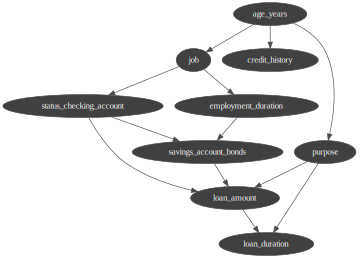

In [28]:
gnb.showBN(bn)

In [20]:
# read in the data for the probabilities
import pandas as pd
X = pd.read_csv("data/features.csv")
# y = pd.read_csv("data/targets.csv")

In [21]:
# calculate the probabilities
from utils.get_data import get_conditional_probability, get_probability, ATTRIBUTE_MAP

# get the identifiers from the attribute map
identifiers = [ATTRIBUTE_MAP[item]["identifier"] for item in ATTRIBUTE_MAP]

# for each of the attributes on the tree, calculate the probabilities
bn.cpt("age_years").fillWith(get_probability(X, "age_years"))
bn.cpt("credit_history").fillWith(get_conditional_probability(X, "credit_history", "age_years"))
bn.cpt("purpose").fillWith(get_conditional_probability(X, "purpose", "age_years"))
bn.cpt("job").fillWith(get_conditional_probability(X, "job", "age_years"))
# bn.cpt("loan_amount").fillWith(get_conditional_probability(X, "loan_amount", "purpose"))
# bn.cpt("loan_duration").fillWith(get_conditional_probability(X, "loan_duration", "purpose"))
# bn.cpt("employment_duration").fillWith(get_conditional_probability(X, "employment_duration", "job"))

/home/simba/projects/ai/a1/.venv/lib/python3.10/site-packages/pyAgrum/pyAgrum.py:9112: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val = _pyAgrum.Potential_fillWith(self, *args)
/home/simba/projects/ai/a1/.venv/lib/python3.10/site-packages/pyAgrum/pyAgrum.py:9112: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val = _pyAgrum.Potential_fillWith(self, *args)
/home/simba/projects/ai/a1/.venv/lib/python3.10/site-packages/pyAgrum/pyAgrum.py:9112: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavio

(pyAgrum.Potential<double>@0x55bc3bac9a50) 
      ||  job                                  |
age_ye||unemploye|unskilled|skilled_e|managemen|
------||---------|---------|---------|---------|
young || 0.0204  | 0.1769  | 0.6837  | 0.1190  |
middle|| 0.0147  | 0.2287  | 0.5718  | 0.1848  |
old   || 0.0704  | 0.2535  | 0.4648  | 0.2113  |

In [ ]:
bn.cpt("credit_history")